<a href="https://colab.research.google.com/github/Poojashrees3/Statistics-and-machine-learning/blob/main/Assignment_1_stats_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding Statistical Analysis Concepts**

In [2]:
import yfinance as yf
import pandas as pd

# Fetch data for a stock (apple)
ticker = "AAPL"
data = yf.download(ticker, start="2023-01-01", end="2024-01-01", interval="1d")

# Save to CSV
data.to_csv("apple_stock.csv")
print("Data saved to apple_stock.csv")

[*********************100%***********************]  1 of 1 completed

Data saved to apple_stock.csv


Considering dataset for 1 year

In [3]:
import pandas as pd
import statistics

data = pd.read_csv('apple_stock.csv')
df = pd.DataFrame(data)
df

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-03 00:00:00+00:00,123.7684555053711,125.06999969482422,130.89999389648438,124.16999816894531,130.27999877929688,112117500
3,2023-01-04 00:00:00+00:00,125.04502868652344,126.36000061035156,128.66000366210938,125.08000183105469,126.88999938964844,89113600
4,2023-01-05 00:00:00+00:00,123.7189712524414,125.0199966430664,127.7699966430664,124.76000213623047,127.12999725341797,80962700
...,...,...,...,...,...,...,...
247,2023-12-22 00:00:00+00:00,192.6561737060547,193.60000610351562,195.41000366210938,192.97000122070312,195.17999267578125,37122800
248,2023-12-26 00:00:00+00:00,192.10887145996094,193.0500030517578,193.88999938964844,192.8300018310547,193.61000061035156,28919300
249,2023-12-27 00:00:00+00:00,192.20835876464844,193.14999389648438,193.5,191.08999633789062,192.49000549316406,48087700
250,2023-12-28 00:00:00+00:00,192.6362762451172,193.5800018310547,194.66000366210938,193.1699981689453,194.13999938964844,34049900


1.Performing descriptive statistical analysis using


describe() function- describes the statistical values every parameter in the dataset

In [14]:
for col in ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    #  new DataFrame for the current column
    columns = pd.DataFrame(df[col])
    print(columns)

# Descriptive statistics for numeric columns
print(df.describe())
print(df.info())

      Adj Close
0           NaN
1           NaN
2    123.768456
3    125.045029
4    123.718971
..          ...
247  192.656174
248  192.108871
249  192.208359
250  192.636276
251  191.591385

[252 rows x 1 columns]
          Close
0           NaN
1           NaN
2    125.070000
3    126.360001
4    125.019997
..          ...
247  193.600006
248  193.050003
249  193.149994
250  193.580002
251  192.529999

[252 rows x 1 columns]
           High
0           NaN
1           NaN
2    130.899994
3    128.660004
4    127.769997
..          ...
247  195.410004
248  193.889999
249  193.500000
250  194.660004
251  194.399994

[252 rows x 1 columns]
            Low
0           NaN
1           NaN
2    124.169998
3    125.080002
4    124.760002
..          ...
247  192.970001
248  192.830002
249  191.089996
250  193.169998
251  191.729996

[252 rows x 1 columns]
           Open
0           NaN
1           NaN
2    130.279999
3    126.889999
4    127.129997
..          ...
247  195.179993
248  193

Through the above description of data some missing data is found, further using dropna function we can drop the rows having missing values, further considering teh closing price - 'close' as parameter continuing the statistical functions


1.1 Measure  of central tendancy

In [19]:
import numpy as np
from statistics import mode

df.dropna(subset=['Close'], inplace=True) # dropna drops the missingvalues

df['Close'] = pd.to_numeric(df['Close'], errors='coerce') # converting float type to numeric
close_prices = df['Close']

print("Mean:", np.mean(close_prices))

print("Median:", np.median(close_prices))

print("Mode:", mode(close_prices))



Mean: 172.54900030517578
Median: 175.47500610351562
Mode: 163.75999450683594


1.2 Measure of dispersion

In [21]:
print("Standard Deviation:", np.std(close_prices))
print("Sum:", np.var(close_prices))
Range = max(close_prices) - min(close_prices)
print("Range:", Range)

Standard Deviation: 17.296973900190725
Sum: 299.1853061038791
Range: 73.09000396728518


2.Plotting line and histogram to get some key insights

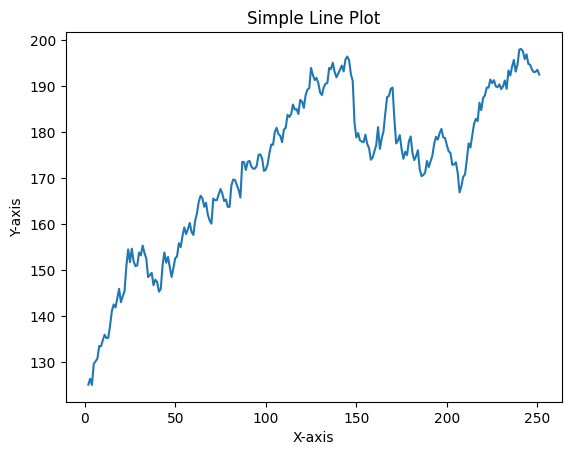

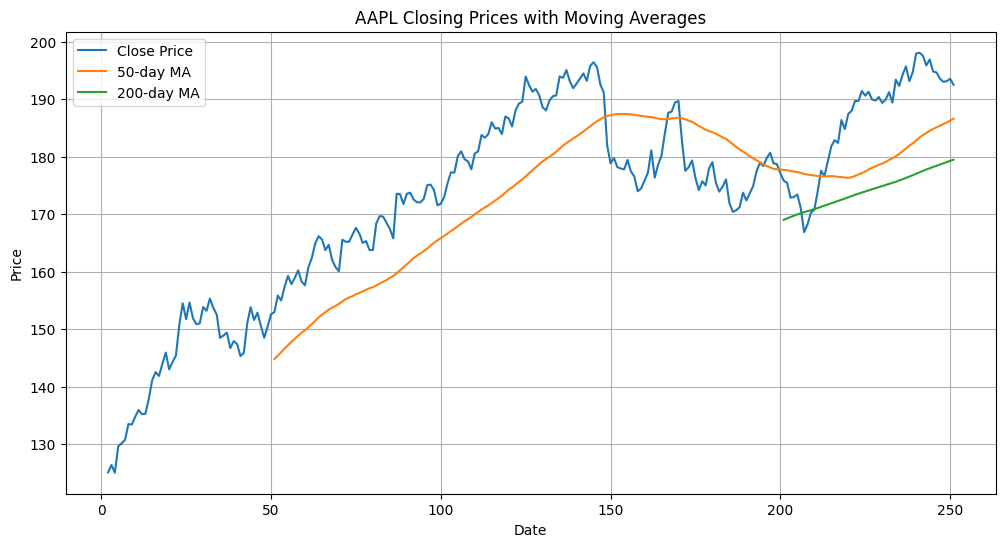

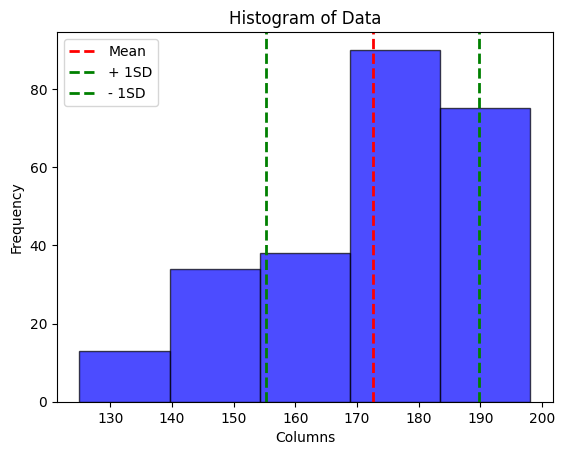

In [24]:
from matplotlib import pyplot as plt

plt.plot(close_prices)
plt.title("Simple Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

#  closing prices with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA50'], label='50-day MA')
plt.plot(df['MA200'], label='200-day MA')
plt.title('AAPL Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


plt.hist(close_prices, bins=5, color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of Data")
plt.xlabel("Columns")
plt.ylabel("Frequency")
plt.axvline(np.mean(close_prices), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.mean(close_prices) + np.std(close_prices), color='green', linestyle='dashed', linewidth=2, label='+ 1SD')
plt.axvline(np.mean(close_prices)- np.std(close_prices), color='green', linestyle='dashed', linewidth=2, label='- 1SD')
plt.legend()
plt.show()

Some key insights
1. The first line plot shows the trends of closing prices over  time, the stock prices are generally increasing.

2. The second line plot gives some more clearer insights, it helps to understand underlying trends,as the 50 days moving average is crosses above the 200 days moving average, which signals the potential buy period.

3. The third histogram chart gives insights about the varaibility of the stock price, the +1SD and -1SD shows the variability or volatility of the stock price,here most of the data points lie within +1 SD of the mean this indicates the statstical variation, the mean indicates the typical price over the period.